In [1]:
# Create two tensors and add them element-wise.
import torch

tensor_a = torch.tensor([1, 2, 3])
tensor_b = torch.tensor([4, 5, 6])
addition_result = tensor_a + tensor_b
print("Addition Result:", addition_result)

Addition Result: tensor([5, 7, 9])


In [2]:
# Subtract tensor_b from tensor_a element-wise.
subtraction_result = tensor_a - tensor_b
print("Subtraction Result:", subtraction_result)

Subtraction Result: tensor([-3, -3, -3])


In [3]:
# Subtract tensor_b from tensor_a element-wise.
subtraction_result = tensor_a - tensor_b
print("Subtraction Result:", subtraction_result)

Subtraction Result: tensor([-3, -3, -3])


In [4]:
# Multiply two tensors element-wise.
multiplication_result = tensor_a * tensor_b
print("Element-wise Multiplication Result:", multiplication_result)

Element-wise Multiplication Result: tensor([ 4, 10, 18])


In [5]:
# Divide tensor_b by tensor_a element-wise.
division_result = tensor_b / tensor_a.float()  # converting to float for division
print("Element-wise Division Result:", division_result)

Element-wise Division Result: tensor([4.0000, 2.5000, 2.0000])


In [6]:
# For matrix multiplication, create 2D tensors.
tensor_c = torch.tensor([[1, 2], [3, 4]])
tensor_d = torch.tensor([[5, 6], [7, 8]])
matrix_product = torch.mm(tensor_c, tensor_d)
print("Matrix Multiplication Result:\n", matrix_product)

Matrix Multiplication Result:
 tensor([[19, 22],
        [43, 50]])


In [7]:
# Compute the exponential and logarithm of a tensor.
tensor_e = torch.tensor([1.0, 2.0, 3.0])
exp_result = torch.exp(tensor_e)
log_result = torch.log(exp_result)  # log(exp(x)) should return x
print("Exponential Result:", exp_result)
print("Logarithm of Exponential (should equal original tensor):", log_result)

Exponential Result: tensor([ 2.7183,  7.3891, 20.0855])
Logarithm of Exponential (should equal original tensor): tensor([1., 2., 3.])


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Explanation:
Here, the previously generated matrices are converted to Torch tensors. The cell times the Torch matrix multiplication on CPU and compares the resulting matrix to the Python implementation by computing the maximum absolute difference between corresponding elements.

In [10]:
import time
import numpy as np

def python_matmul(A, B):
    """
    Naive Python matrix multiplication.
    A is an m x n list of lists and B is an n x p list of lists.
    Returns the resulting m x p matrix.
    """
    m = len(A)
    n = len(A[0])
    p = len(B[0])
    C = [[0.0 for _ in range(p)] for _ in range(m)]
    for i in range(m):
        for j in range(p):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

# Define matrix size (moderate size for demonstration)
n = 250  # 250x250 matrices
# Generate random matrices as native Python lists
A = [[np.random.rand() for _ in range(n)] for _ in range(n)]
B = [[np.random.rand() for _ in range(n)] for _ in range(n)]

# Time the custom Python matrix multiplication
start_time = time.time()
C_python = python_matmul(A, B)
python_time = time.time() - start_time
print("Python matrix multiplication time (250x250): {:.4f} seconds".format(python_time))

Python matrix multiplication time (250x250): 2.8698 seconds


Explanation:
 generated matrices are converted to Torch tensors. The cell times the Torch matrix multiplication on CPU and compares the resulting matrix to the Python implementation by computing the maximum absolute difference between corresponding elements.

In [12]:
# Convert the Python lists to Torch tensors on CPU
A_torch = torch.tensor(A, dtype=torch.float)
B_torch = torch.tensor(B, dtype=torch.float)

# Time the Torch CPU matrix multiplication
start_time = time.time()
C_torch = A_torch @ B_torch
torch_cpu_time = time.time() - start_time
print("Torch CPU matrix multiplication time (250x250): {:.4f} seconds".format(torch_cpu_time))

# Compare the results between custom Python and Torch CPU
C_python_np = np.array(C_python)
C_torch_np = C_torch.numpy()
difference = np.abs(C_python_np - C_torch_np)
max_diff = np.max(difference)
print("Maximum difference between Python and Torch CPU results:", max_diff)

Torch CPU matrix multiplication time (250x250): 0.0011 seconds
Maximum difference between Python and Torch CPU results: 6.309432039586227e-05


Explanation:
This cell checks for CUDA availability. If CUDA is available, it moves the Torch tensors to the GPU, warms up the GPU, times the GPU-based matrix multiplication (using torch.matmul), and finally synchronizes to ensure accurate timing. The GPU result is brought back to CPU for comparing numerical accuracy (maximum difference) against the Python implementation

In [ ]:
# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    # Move A and B to CUDA
    A_cuda = A_torch.to(device)
    B_cuda = B_torch.to(device)
    
    # Warm up the GPU to avoid startup latency affecting timing
    _ = torch.matmul(A_cuda, B_cuda)
    
    # Time the CUDA matrix multiplication
    start_time = time.time()
    C_cuda = torch.matmul(A_cuda, B_cuda)
    torch.cuda.synchronize()  # Wait for CUDA to finish computation
    cuda_time = time.time() - start_time
    print("Torch CUDA matrix multiplication time (250x250): {:.4f} seconds".format(cuda_time))
    
    # Move CUDA result back to CPU for accuracy comparison
    C_cuda_cpu = C_cuda.cpu().numpy()
    difference_cuda = np.abs(C_python_np - C_cuda_cpu)
    max_diff_cuda = np.max(difference_cuda)
    print("Maximum difference between Python and Torch CUDA results:", max_diff_cuda)
else:
    print("CUDA is not available on this system.")

CUDA is not available on this system.


In [ ]:
# Scientific Machine Learning Libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

In [ ]:
# Cell 1: Advanced Data Generation and Exploration
def generate_complex_dataset(n_samples=1000, n_features=15, n_classes=2, 
                              class_separation=0.8, random_state=42):
    """
    Generate a more complex synthetic classification dataset with customizable parameters.
    
    Args:
        n_samples (int): Total number of samples
        n_features (int): Number of input features
        n_classes (int): Number of target classes
        class_separation (float): Controls the difficulty of the classification task
        random_state (int): Seed for reproducibility
    
    Returns:
        tuple: Generated features and labels
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=int(n_features * 0.7),  # More meaningful features
        n_redundant=int(n_features * 0.2),    # Some redundant features
        n_classes=n_classes,
        n_clusters_per_class=1,
        class_sep=class_separation,
        random_state=random_state
    )
    return X, y

In [ ]:
def visualize_dataset(X, y):
    """
    Create comprehensive visualizations of the generated dataset.
    
    Args:
        X (np.ndarray): Input features
        y (np.ndarray): Target labels
    """
    plt.figure(figsize=(15, 5))
    
    # 1. Feature Distribution
    plt.subplot(131)
    sns.boxplot(data=X)
    plt.title('Feature Distributions')
    plt.xticks(rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Value')
    
    # 2. Label Distribution
    plt.subplot(132)
    sns.countplot(x=y)
    plt.title('Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    
    # 3. Correlation Heatmap
    plt.subplot(133)
    sns.heatmap(np.corrcoef(X.T), cmap='coolwarm', center=0)
    plt.title('Feature Correlation')
    
    plt.tight_layout()
    plt.show()

In [ ]:
class FlexibleNeuralNetwork(nn.Module):
    """
    Flexible neural network with configurable architecture.
    Supports dynamic layer generation and multiple activation functions.
    """
    def __init__(self, input_size, hidden_layers=[64, 32], 
                 activation=nn.ReLU(), dropout_rate=0.2):
        super().__init__()
        
        layers = []
        prev_size = input_size
        
        # Dynamic hidden layers
        for layer_size in hidden_layers:
            layers.extend([
                nn.Linear(prev_size, layer_size),
                activation,
                nn.BatchNorm1d(layer_size),
                nn.Dropout(dropout_rate)
            ])
            prev_size = layer_size
        
        # Final classification layer
        layers.append(nn.Linear(prev_size, 2))  # Binary classification
        
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)

In [ ]:
class FlexibleNeuralNetwork(nn.Module):
    """
    Flexible neural network with configurable architecture.
    Supports dynamic layer generation and multiple activation functions.
    """
    def __init__(self, input_size, hidden_layers=[64, 32], 
                 activation=nn.ReLU(), dropout_rate=0.2):
        super().__init__()
        
        layers = []
        prev_size = input_size
        
        # Dynamic hidden layers
        for layer_size in hidden_layers:
            layers.extend([
                nn.Linear(prev_size, layer_size),
                activation,
                nn.BatchNorm1d(layer_size),
                nn.Dropout(dropout_rate)
            ])
            prev_size = layer_size
        
        # Final classification layer
        layers.append(nn.Linear(prev_size, 2))  # Binary classification
        
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)

In [ ]:
def train_and_evaluate(model, datasets, learning_rate=0.001, epochs=200):
    """
    Comprehensive training and evaluation pipeline.
    
    Args:
        model (nn.Module): Neural network model
        datasets (dict): Preprocessed datasets
        learning_rate (float): Optimization learning rate
        epochs (int): Number of training epochs
    
    Returns:
        dict: Training history and final performance metrics
    """
    # Prepare data loaders
    train_dataset = TensorDataset(
        datasets['train']['features'], 
        datasets['train']['labels']
    )
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', patience=10, factor=0.5
    )
    
    # Training tracking
    train_losses, val_losses = [], []
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0
        for batch_features, batch_labels in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_features)
            loss = criterion(outputs, batch_labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # Validation phase
        model.eval()
        with torch.no_grad():
            val_outputs = model(datasets['validation']['features'])
            val_loss = criterion(val_outputs, datasets['validation']['labels'])
        
        # Record losses
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss.item())
        
        # Learning rate adjustment
        scheduler.step(val_loss)
        
        # Progress tracking
        if epoch % 20 == 0:
            print(f'Epoch {epoch}: Train Loss = {train_losses[-1]:.4f}, '
                   f'Val Loss = {val_losses[-1]:.4f}')
    
    # Final evaluation
    model.eval()
    with torch.no_grad():
        test_outputs = model(datasets['test']['features'])
        _, predicted = torch.max(test_outputs, 1)
        accuracy = (predicted == datasets['test']['labels']).float().mean()
    
    return {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'test_accuracy': accuracy.item()
    }

In [ ]:
# Optionally, add visualizations like confusion matrix.
def plot_confusion_matrix(model, datasets):
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    model.eval()
    with torch.no_grad():
        outputs = model(datasets['test']['features'])
        _, predicted = torch.max(outputs, 1)
    cm = confusion_matrix(datasets['test']['labels'].numpy(), predicted.cpu().numpy())
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
def plot_training_dynmics(history):
    """
    Visualize training and validation losses.
    """
    plt.figure(figsize=(12, 4))
    
    plt.subplot(121)
    plt.plot(history['train_losses'], label='Training Loss')
    plt.plot(history['val_losses'], label='Validation Loss')
    plt.title('Loss Progression')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(122)
    plt.title(f'Test Accuracy: {history["test_accuracy"]*100:.2f}%')
    plt.axis('off')
    plt.text(0.5, 0.5, f'{history["test_accuracy"]*100:.2f}%', 
             horizontalalignment='center', 
             verticalalignment='center', 
             fontsize=20)
    
    plt.tight_layout()
    plt.show()


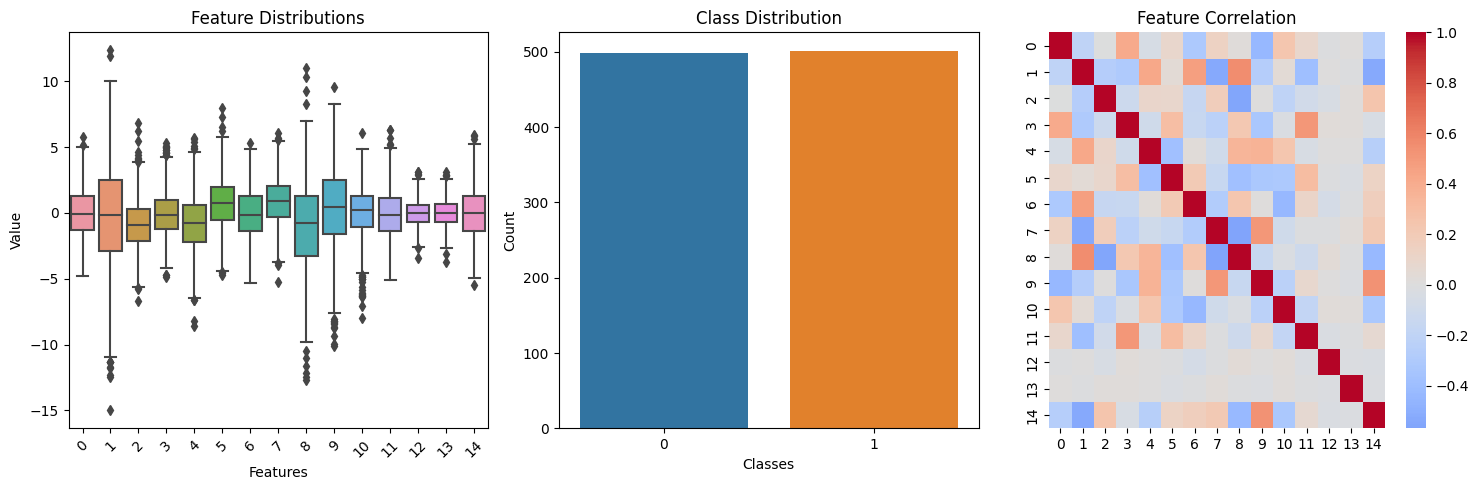

Epoch 0: Train Loss = 0.5889, Val Loss = 0.4565
Epoch 20: Train Loss = 0.0724, Val Loss = 0.0911
Epoch 40: Train Loss = 0.0385, Val Loss = 0.0957
Epoch 60: Train Loss = 0.0507, Val Loss = 0.0916
Epoch 80: Train Loss = 0.0397, Val Loss = 0.0966
Epoch 100: Train Loss = 0.0446, Val Loss = 0.0965
Epoch 120: Train Loss = 0.0375, Val Loss = 0.1008
Epoch 140: Train Loss = 0.0490, Val Loss = 0.0939
Epoch 160: Train Loss = 0.0392, Val Loss = 0.0977
Epoch 180: Train Loss = 0.0499, Val Loss = 0.1002


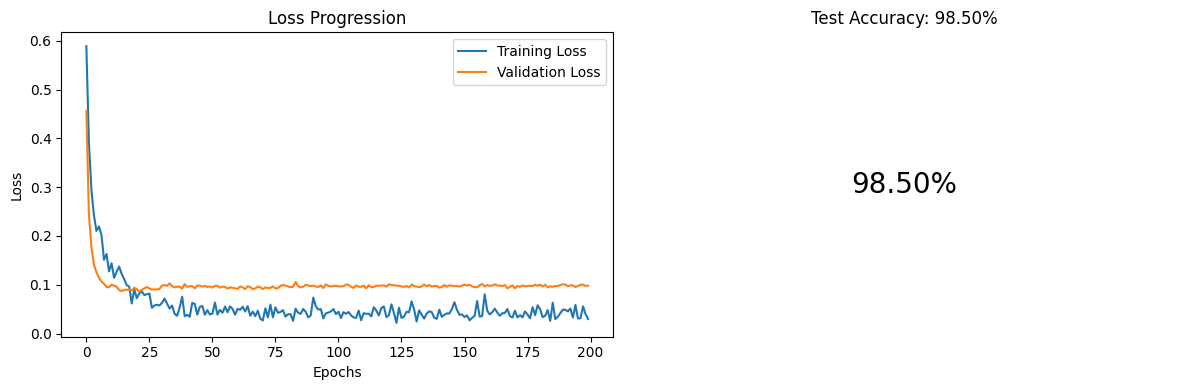

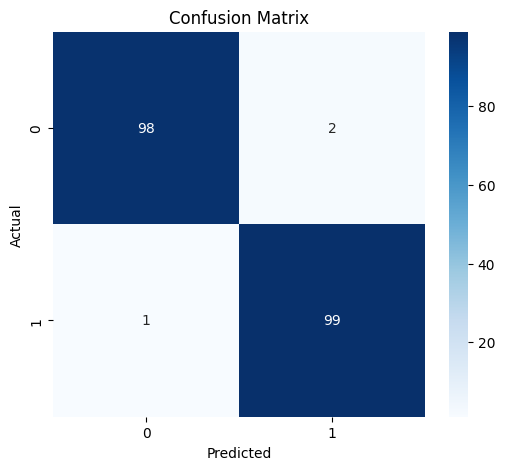

In [ ]:
def main():
    # Generate dataset
    X, y = generate_complex_dataset()
    
    # Visualize dataset characteristics
    visualize_dataset(X, y)
    
    # Preprocess data
    preprocessor = DataPreprocessor()
    datasets = preprocessor.preprocess(X, y)
    
    # Initialize model
    model = FlexibleNeuralNetwork(
        input_size=X.shape[1], 
        hidden_layers=[64, 32], 
        dropout_rate=0.3
    )
    
    # Train and evaluate
    training_history = train_and_evaluate(model, datasets)
    
    # Visualize results
    plot_training_dynmics(training_history)
    plot_confusion_matrix(model, datasets)

# Run the entire workflow
if __name__ == '__main__':
    main()
